In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-competition-sjce/test.csv
/kaggle/input/ml-competition-sjce/data.csv


In [3]:
df=pd.read_csv('/kaggle/input/ml-competition-sjce/data.csv')

In [4]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,NaN,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,NaN,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0
...,...,...,...,...,...,...,...,...,...,...
2615,NaN,202.886990,24518.574297,7.217408,360.154113,492.352061,16.743289,72.710127,4.174569,0
2616,7.248991,184.071034,33123.442980,7.186173,322.365661,345.356576,15.164134,68.847544,4.255980,0
2617,5.596930,162.724672,23930.374549,7.456557,NaN,535.339561,19.174739,54.966317,3.506765,0
2618,5.924540,186.620068,44376.187382,6.614180,341.637774,273.446838,12.758115,59.456691,4.224343,0


In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,NaN,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,NaN,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0


In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.shape

(2620, 10)

In [8]:
df.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0     6.150553  212.819377  15017.747281     5.544436  319.494952   
1          NaN  180.680598   8692.538152     8.671793  396.528754   
2     5.344117  198.379144  13492.840835     6.559265  328.648845   
3     7.647872  160.774353  29000.589712     7.217409         NaN   
4     8.129586  177.898967  27834.217696     9.006008  334.438539   
...        ...         ...           ...          ...         ...   
2615       NaN  202.886990  24518.574297     7.217408  360.154113   
2616  7.248991  184.071034  33123.442980     7.186173  322.365661   
2617  5.596930  162.724672  23930.374549     7.456557         NaN   
2618  5.924540  186.620068  44376.187382     6.614180  341.637774   
2619  7.918087  175.337240  29565.711108     7.432180         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       279.447066       12.850506        75.028793   4.810537

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2234.000000,2620.000000,2620.000000,2620.000000,1999.000000,2620.000000,2620.000000,2495.000000,2620.000000,2620.000000
mean,7.071024,196.200911,21973.377381,7.130793,334.040923,425.749573,14.292469,66.194111,3.965649,0.394275
std,1.588089,33.137494,8702.501618,1.584109,41.573027,81.038498,3.272972,16.186110,0.783198,0.488788
min,0.000000,47.432000,728.750830,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.089577,176.734160,15715.740730,6.125502,307.992545,365.842780,12.067417,55.711220,3.441806,0.000000
50%,7.022285,196.926487,20926.882155,7.131972,333.073546,421.884968,14.220645,66.299162,3.962234,0.000000
75%,8.035837,216.657847,27216.632550,8.105680,360.601377,481.089353,16.541731,77.127254,4.497554,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,27.006707,124.000000,6.739000,1.000000


In [10]:
df.isnull().sum()

ph                 386
Hardness             0
Solids               0
Chloramines          0
Sulfate            621
Conductivity         0
Organic_carbon       0
Trihalomethanes    125
Turbidity            0
Potability           0
dtype: int64

In [11]:
df['Sulfate'].mean()

334.04092346114305

In [12]:
df['ph'].mean()

7.071024185772258

In [13]:
df['Trihalomethanes'].mean()

66.19411138522965

In [14]:
df.fillna(df.mean(),inplace=True)

In [15]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,7.071024,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,334.040923,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0


In [16]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
df['Potability']

0       0
1       0
2       1
3       1
4       0
       ..
2615    0
2616    0
2617    0
2618    0
2619    1
Name: Potability, Length: 2620, dtype: int64

In [18]:
df.Potability.value_counts()

Potability
0    1587
1    1033
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt


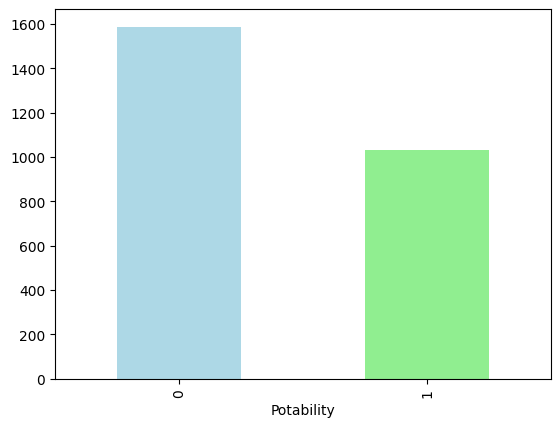

In [20]:
df.Potability.value_counts().plot(kind="bar", color=["lightblue", "lightgreen"])
plt.show()

<Axes: >

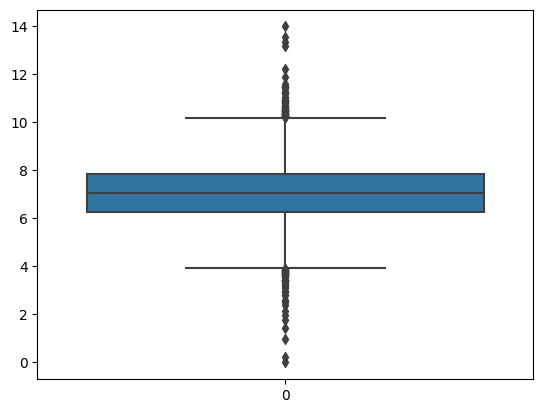

In [21]:
import seaborn as sns
sns.boxplot(df['ph'])

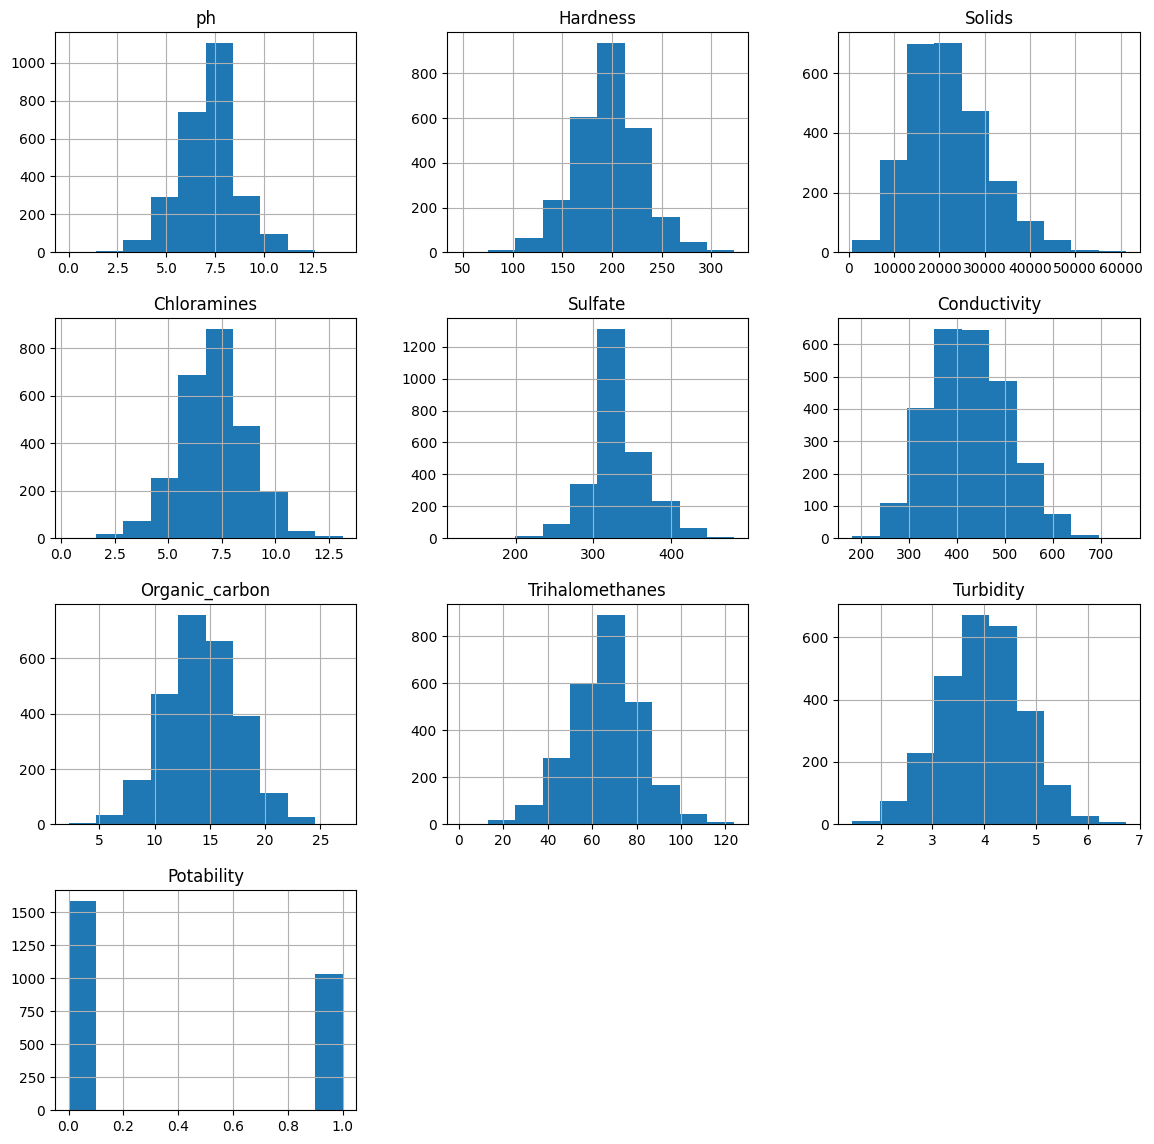

In [22]:
df.hist(figsize=(14,14))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


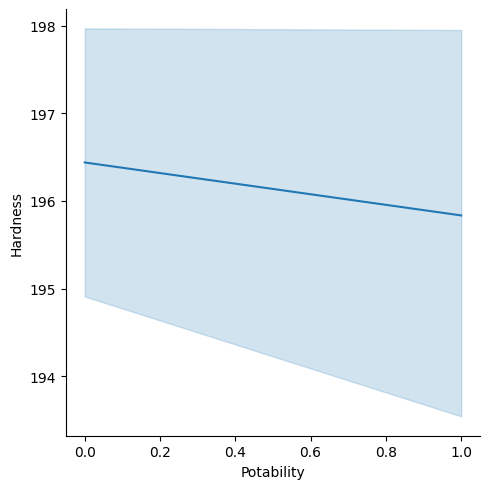

In [23]:
sns.relplot(y=df['Hardness'],x=df['Potability'],kind='line')

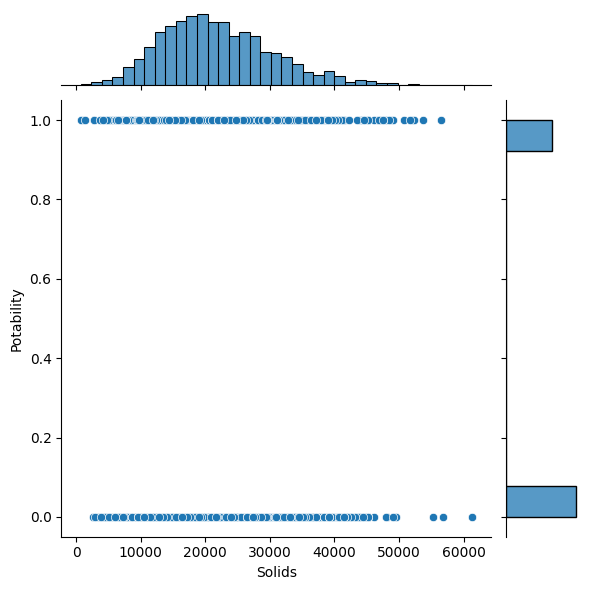

In [24]:
sns.jointplot(x=df['Solids'],y=df['Potability'])

<Axes: ylabel='Turbidity'>

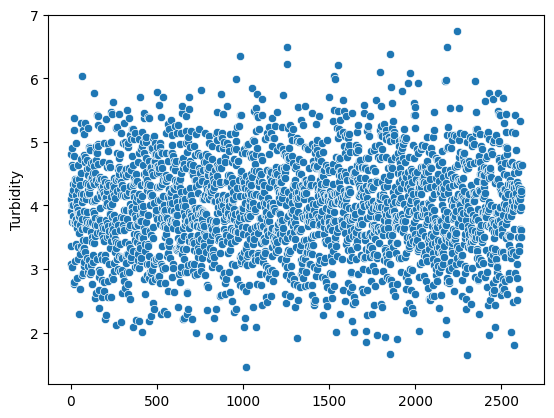

In [53]:
sns.scatterplot(df['Turbidity'])

<Axes: ylabel='ph'>

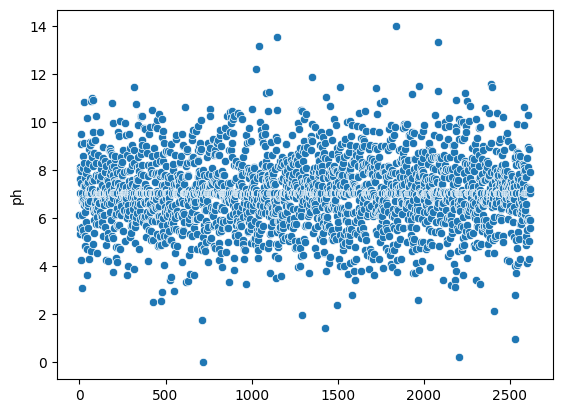

In [25]:
sns.scatterplot(df['ph'])

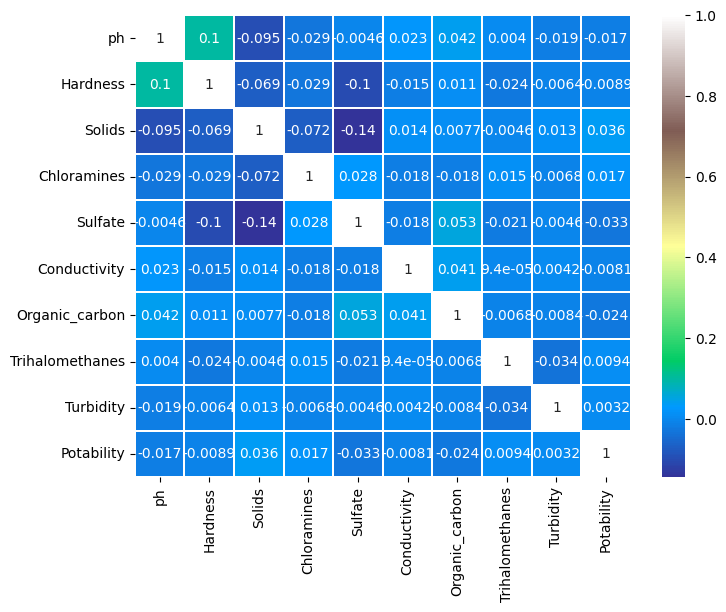

In [26]:
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [27]:
X=df.drop('Potability',axis=1)

In [29]:
Y=df['Potability']

In [30]:
X


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537
1,7.071024,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699
3,7.647872,160.774353,29000.589712,7.217409,334.040923,438.800961,13.182501,67.099969,3.078673
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537
...,...,...,...,...,...,...,...,...,...
2615,7.071024,202.886990,24518.574297,7.217408,360.154113,492.352061,16.743289,72.710127,4.174569
2616,7.248991,184.071034,33123.442980,7.186173,322.365661,345.356576,15.164134,68.847544,4.255980
2617,5.596930,162.724672,23930.374549,7.456557,334.040923,535.339561,19.174739,54.966317,3.506765
2618,5.924540,186.620068,44376.187382,6.614180,341.637774,273.446838,12.758115,59.456691,4.224343


In [31]:
Y

0       0
1       0
2       1
3       1
4       0
       ..
2615    0
2616    0
2617    0
2618    0
2619    1
Name: Potability, Length: 2620, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=404,shuffle=True)

In [33]:
Y_train

1762    1
1938    0
1093    1
144     0
1399    1
       ..
1935    1
1012    0
1206    1
1898    0
1788    1
Name: Potability, Length: 2096, dtype: int64

In [34]:
Y_train.value_counts()

Potability
0    1272
1     824
Name: count, dtype: int64

In [35]:
Y_test.value_counts()

Potability
0    315
1    209
Name: count, dtype: int64

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

DT = DecisionTreeClassifier(criterion = 'log_loss',min_samples_split =9 , splitter='best')

In [37]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='log_loss', min_samples_split=9)

In [38]:
Y_train

1762    1
1938    0
1093    1
144     0
1399    1
       ..
1935    1
1012    0
1206    1
1898    0
1788    1
Name: Potability, Length: 2096, dtype: int64

In [39]:
Y_prediction=DT.predict(X_test)

In [40]:
accuracy_score(Y_prediction,Y_test)

0.6221374045801527

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [42]:

abc = AdaBoostClassifier(n_estimators=60,
                         learning_rate=0.7)
# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)


In [43]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


Accuracy: 0.6240458015267175


In [46]:
df2=pd.read_csv('/kaggle/input/ml-competition-sjce/test.csv')

In [47]:
df2=df2.fillna(method='ffill',axis=0)

In [48]:
df2['ph']=df2['ph'].fillna(df['ph'].mean())

In [49]:
x=df2.drop(columns=['id'],axis=0)

In [50]:
y=df2['id']

In [52]:
df3=pd.DataFrame(y)
df3['Potability']=pd.DataFrame(model.predict(x))
df3

,id,Potability
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
651,652,0
652,653,0
653,654,0
654,655,0


In [54]:
df3.to_csv('submission.csv',index=False)